# Backward D4DX4 scheme

Used close to outer x processor boundaries. The following scheme is 2rd order convergent.

In [1]:
from IPython.display import display
from sympy import init_printing
from sympy import symbols, together, as_finite_diff, simplify, solve
from sympy import Function, Eq, S, Subs, Derivative

init_printing()

In [2]:
x = symbols('x')
h = symbols('h', positive=True)

f = Function('f')

# Stencils
stencil = [x-4*h ,x-3*h, x-2*h, x-h, x, x+h]

We are here discretizing the equation

$$ \partial_\rho^4 f$$

### Calculate the finite difference approximation of $\partial_x^4 f$

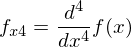

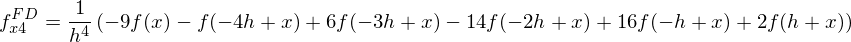

(-9*f(x) - f(-4*h + x) + 6*f(-3*h + x) - 14*f(-2*h + x) + 16*f(-h + x) + 2*f(h + x))/h**4


In [3]:
fx4 = f(x).diff(x,4)
fx4FD = as_finite_diff(fx4, stencil)
display(Eq(symbols('f_x4'), fx4))
display(Eq(symbols('f^FD_x4'), together(fx4FD)))
print(together(fx4FD))

# Calculating the order

Let's call the Taylor expansions of $f$ for $T[f(x,a)] = \sum_{n=0}^\infty\frac{f^{(n)}(a)}{n!}(x-a)^n$

In [4]:
x0 = symbols('x0')
terms = 7

Taylor expasion of $f$ expanded around $a=x_0$ evaluated in $x=x_0$

In [5]:
F = f(x).series(x, x0=x0, n=terms)
F = F.subs(x-x0,0)
display(Eq(symbols('F'),F))

Taylor expasion of $f$ expanded around $a=x_0+h$ evaluated in $x=x_0$

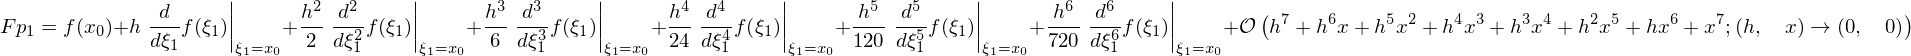

In [6]:
Fp1 = f(x+h).series(x+h, x0=x0, n=terms)
Fp1 = Fp1.subs(x-x0,0)
display(Eq(symbols('Fp1'),Fp1))

Taylor expasion of $f$ expanded around $a=x_0-h$ evaluated in $x=x_0$

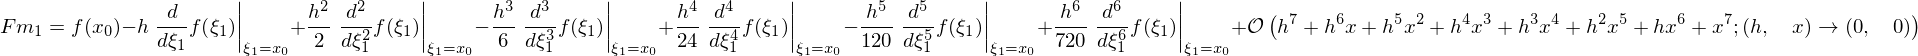

In [7]:
Fm1 = f(x-h).series(x-h, x0=x0, n=terms)
Fm1 = Fm1.subs(x-x0,0)
display(Eq(symbols('Fm1'),Fm1))

Taylor expasion of $f$ expanded around $a=x_0-2h$ evaluated in $x=x_0$

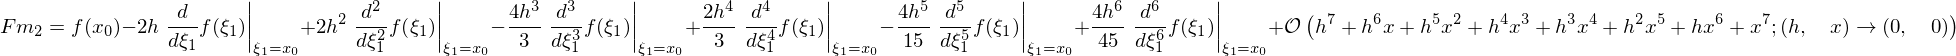

In [8]:
Fm2 = f(x-2*h).series(x-2*h, x0=x0, n=terms)
Fm2 = Fm2.subs(x-x0,0)
display(Eq(symbols('Fm2'),Fm2))

Taylor expasion of $f$ expanded around $a=x_0-3h$ evaluated in $x=x_0$

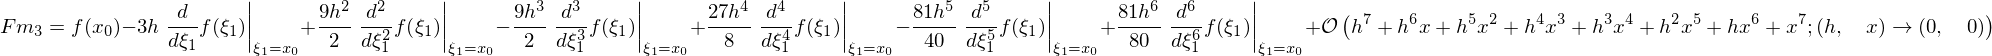

In [9]:
Fm3 = f(x-3*h).series(x-3*h, x0=x0, n=terms)
Fm3 = Fm3.subs(x-x0,0)
display(Eq(symbols('Fm3'),Fm3))

Taylor expasion of $f$ expanded around $a=x_0-4h$ evaluated in $x=x_0$

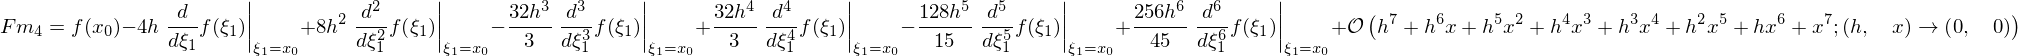

In [10]:
Fm4 = f(x-4*h).series(x-4*h, x0=x0, n=terms)
Fm4 = Fm4.subs(x-x0,0)
display(Eq(symbols('Fm4'),Fm4))

Substitute into the FD scheme

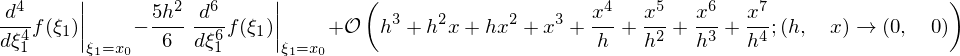

In [11]:
fx4FDT = fx4FD.subs([
                     (f(x+h)  , Fp1),
                     (f(x)    , F  ),
                     (f(x-h)  , Fm1),
                     (f(x-2*h), Fm2),
                     (f(x-3*h), Fm3),
                     (f(x-4*h), Fm4),                      
                    ])
display(simplify(fx4FDT))

Thus, we see that this discretization is 2nd order accurate.

## When the last point is a neumann BC

First find the equation to solve (use the boundary value as a reference point)

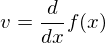

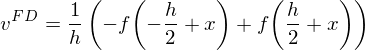

In [12]:
# Stencil
stencil = [x-h/2, x+h/2]

v = f(x).diff(x)
vFD = as_finite_diff(v, stencil)
display(Eq(symbols('v'), v))
display(Eq(symbols('v^FD'), together(vFD)))

Taylor expasion of $f$ expanded around $a=x_0-\frac{h}{2}$ evaluated in $x=x_0$

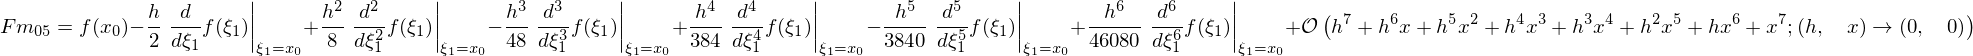

In [13]:
Fm05 = f(x-h/2).series(x-h/2, x0=x0, n=terms)
Fm05 = Fm05.subs(x-x0,0)
display(Eq(symbols('Fm05'),Fm05))

Taylor expasion of $f$ expanded around $a=x_0+\frac{h}{2}$ evaluated in $x=x_0$

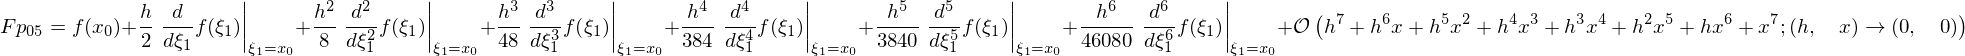

In [14]:
Fp05 = f(x+h/2).series(x+h/2, x0=x0, n=terms)
Fp05 = Fp05.subs(x-x0,0)
display(Eq(symbols('Fp05'),Fp05))

Solve FD for $f\left(x+\frac{h}{2}\right)$

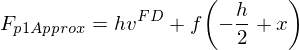

In [15]:
fp1Approx = solve(Eq(symbols('v^FD'), together(vFD)), f(x+h/2))[0]
display(Eq(symbols('F_p1Approx'), fp1Approx))

Substitute into the Taylor expansion

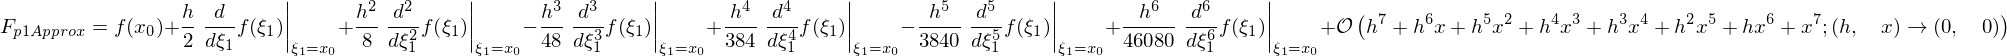

In [16]:
fp1ApproxT = fp1Approx.subs([
                (f(x-h/2), Fm05),
                (symbols('v^FD'),
                 Subs(Derivative(f(symbols('xi_1')), symbols('xi_1')), (symbols('xi_1'),), (symbols('x0'),)))
                ])
display(Eq(symbols('F_p1Approx'), fp1ApproxT))

Thus we have that

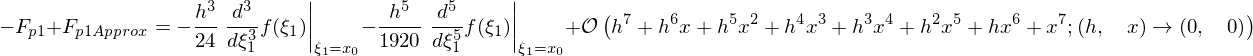

In [17]:
display(Eq(symbols('F_p1Approx')-symbols('F_p1'), fp1ApproxT - Fp05))

Which means that

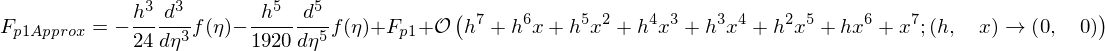

In [18]:
fp1ApproxEta = symbols('F_p1') + fp1ApproxT - Fp05
fp1ApproxEta = fp1ApproxEta.doit().subs([(x0, symbols('eta'))])

display(Eq(symbols('F_p1Approx'), fp1ApproxEta))

where we have changed the variable to take the derivative with respect to to $\eta$, to distinguish between derivatives taken at the boundary, and the last inner point of the domain.

Insertion of taylor expansion of $Fp1$ (where the Taylor expansion is around the last point, and NOT the boundary yields)

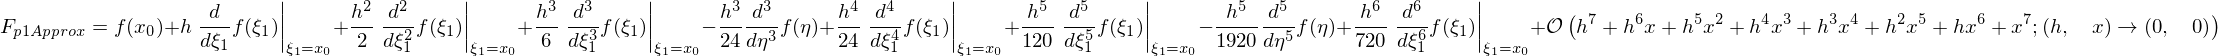

In [19]:
Fp1ApproxEtaT = fp1ApproxEta.subs([(symbols('F_p1'), Fp1)])

display(Eq(symbols('F_p1Approx'), Fp1ApproxEtaT))

Substitute into the FD scheme

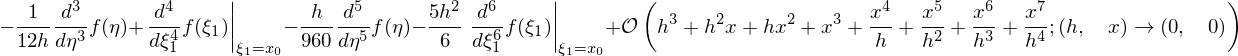

In [20]:
fx4FDT = fx4FD.subs([
                     (f(x+h)  , Fp1ApproxEtaT),
                     (f(x)    , F  ),
                     (f(x-h)  , Fm1),
                     (f(x-2*h), Fm2),
                     (f(x-3*h), Fm3),
                     (f(x-4*h), Fm4),                      
                    ])
display(simplify(fx4FDT))

We see that this is not convergent.